In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [7]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [8]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [16]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

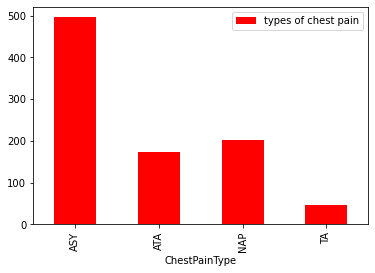

In [17]:
chest_pain = pd.crosstab(index =df.ChestPainType,columns = 'types of chest pain' )
chest_pain.plot(kind = 'bar',color = 'red')
plt.legend()

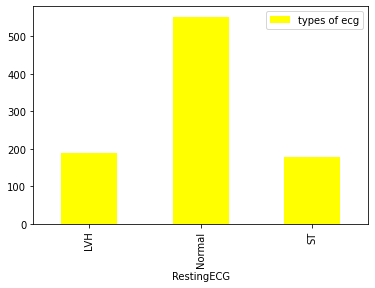

In [19]:
resting_ecg = pd.crosstab(index =df.RestingECG,columns = 'types of ecg' )
resting_ecg.plot(kind = 'bar',color = 'yellow')
plt.legend()

<AxesSubplot:xlabel='ExerciseAngina'>

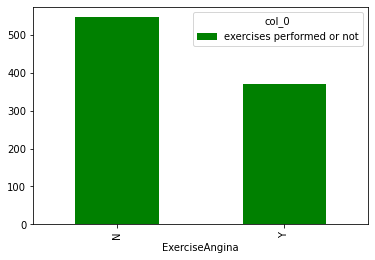

In [20]:
pd.crosstab(index =df.ExerciseAngina,columns = 'exercises performed or not' ).plot(kind = 'bar',color = 'green')

<AxesSubplot:xlabel='ST_Slope'>

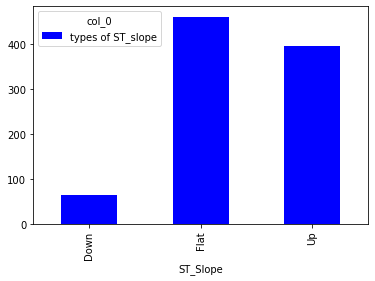

In [21]:
pd.crosstab(index =df.ST_Slope,columns = 'types of ST_slope' ).plot(kind = 'bar',color = 'blue')

In [22]:
df.shape

(918, 12)

In [23]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


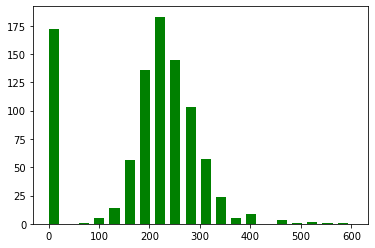

In [29]:
plt.hist(df['Cholesterol'],bins = 20,color = 'green',width = 20)
plt.show()

<AxesSubplot:ylabel='Density'>

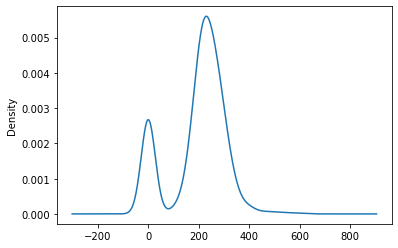

In [30]:
df.Cholesterol.plot.kde() #from above two graphs we can draw a conclusion that we do have outliers

In [32]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]

In [33]:
df1.shape

(915, 12)

In [34]:
df[df.Age>(df.Age.mean()+3*df.Age.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


<AxesSubplot:ylabel='Density'>

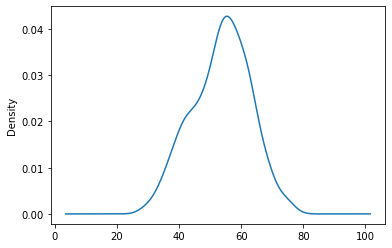

In [35]:
df.Age.plot.kde()

In [ ]:
#we see that both graphucally and mathematically we dont have any outliers in age 

<AxesSubplot:ylabel='Density'>

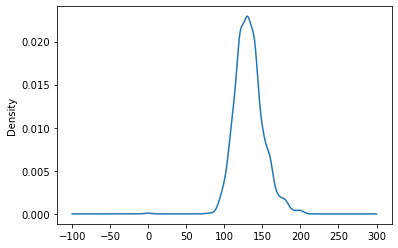

In [36]:
df.RestingBP.plot.kde()

<AxesSubplot:ylabel='Density'>

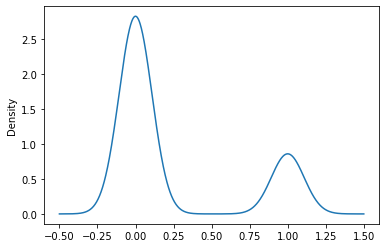

In [37]:
df.FastingBS.plot.kde()

<AxesSubplot:ylabel='Density'>

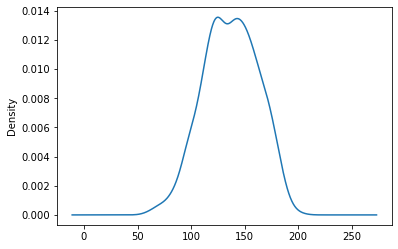

In [38]:
df.MaxHR.plot.kde()

<AxesSubplot:ylabel='Density'>

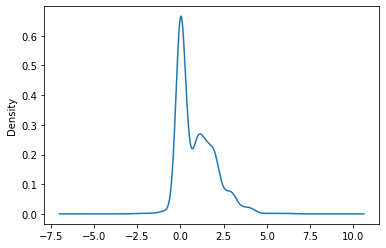

In [39]:
df.Oldpeak.plot.kde()

In [ ]:
#from the above graphs we can conclude that oldpeak,fastingbs have outliers and we can get rid of them using z_score

In [47]:
df2 = df1[df1.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]

In [48]:
df2.shape

(909, 12)

In [49]:
df3 = df2[df2.RestingBP<=df2.RestingBP.mean()+3*df2.RestingBP.std()]
df3.shape

(902, 12)

In [50]:
df4 = df3[df3.FastingBS<=df3.FastingBS.mean()+3*df3.FastingBS.std()]
df4.shape

(902, 12)

In [ ]:
#so now we finally have 902 rows now we will copy df4 into df5

In [51]:
df5 = df4

In [52]:
df5 = pd.get_dummies(df5,drop_first = True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [54]:
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled 

array([[-1.42896269,  0.46089071,  0.85238015, ..., -0.82065181,
        -1.00221976,  1.13805334],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.82065181,
         0.99778516, -0.87869344],
       [-1.74679706, -0.10495034,  0.79657967, ..., -0.82065181,
        -1.00221976,  1.13805334],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ...,  1.21854359,
         0.99778516, -0.87869344],
       [ 0.37209878, -0.10495034,  0.35947592, ..., -0.82065181,
         0.99778516, -0.87869344],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.82065181,
        -1.00221976,  1.13805334]])

In [62]:
X = df5.drop('HeartDisease',axis = 1)
y = df5.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [63]:
len(X_train)

721

In [64]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
586,53,124,243,0,122,2.0,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,0,1,0,0,0,0,0,1,0
377,65,160,0,1,122,1.2,1,0,0,0,0,1,0,1,0
52,45,140,224,1,122,0.0,1,1,0,0,1,0,0,0,1
308,58,115,0,1,138,0.5,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,65,136,248,0,140,4.0,1,0,0,0,1,0,1,0,0
220,46,130,222,0,112,0.0,1,0,0,0,1,0,0,1,0
172,53,140,320,0,162,0.0,1,1,0,0,1,0,0,0,1
360,62,160,0,0,72,0.0,1,0,1,0,1,0,1,1,0


In [65]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8839779005524862

In [66]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8895027624309392

In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.7679558011049724

In [69]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(902, 2)

In [70]:
X_pca

array([[ 93.82516575, -29.40343477],
       [-15.58380044, -14.10534714],
       [ 83.29544144,  38.68553968],
       ...,
       [-67.57277874,  17.61565402],
       [ 40.70355216, -33.38308603],
       [-19.9132065 , -37.29321338]])

In [79]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y,test_size = 0.2,random_state = 30)

In [80]:
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)
lr.score(X_test_pca,y_test)

0.6961325966850829

In [81]:
rf = RandomForestClassifier()
rf.fit(X_train_pca,y_train)
rf.score(X_test_pca,y_test)

0.712707182320442

In [82]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pca,y_train)
dtc.score(X_test_pca,y_test)

0.6574585635359116